In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
%matplotlib inline 

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [37]:
data = pd.read_csv('Santander_train.csv')

In [38]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [40]:
data.shape

(76020, 371)

In [41]:
y = data.TARGET 
data = data.drop('TARGET',axis = 1)

#### Splitting of the data willn't be done now 
#### It will be done after all the feature extraction , selection and elimination is done 

In [42]:
col = data.columns 
col = pd.DataFrame(col)
col.columns = ['Var']
col['Index'] = col.index

col

,Var,Index
0,ID,0
1,var3,1
2,var15,2
3,imp_ent_var16_ult1,3
4,imp_op_var39_comer_ult1,4
...,...,...
365,saldo_medio_var44_hace2,365
366,saldo_medio_var44_hace3,366
367,saldo_medio_var44_ult1,367
368,saldo_medio_var44_ult3,368


### This is the list which shows the steps I have done

1) Removing Constant , Quasi Constant and Duplicate Features [ This will be my basic feature selection]

2) Mutual information Gain [ Classification method]

3) Followed by PCA

4) SelectKBest

5) Now we'll add Embedded Methods to add penalites and regularisations to the features so that the given features doen't overfit the model I'll build for Predicting the satisfaction . [ Using LASSO]

6) Then finally building a model to predict

###  1) Removing Constant and Quasi Constant
Keeping my limit of variability in feature values as 0.01 . Keeping it very high can destroy some features on which the output depends highly but has low variance 

In [43]:
from sklearn.feature_selection import VarianceThreshold

In [44]:
filter_applied = VarianceThreshold(0.01)

In [45]:
filter_applied.fit(data )

VarianceThreshold(threshold=0.01)

In [46]:
features = filter_applied.get_support()

features list contains the bool values of the features with respect to filter_applied .
That is it is true for features with variance more than 0.01 and false otherwise

In [47]:
features= pd.DataFrame(features)
features.columns = ['Bool']
features['Index'] = features.index

Now applied the changes on the my training and test data and again converted them into dataFrame

In [48]:
data = filter_applied.transform(data)
data = pd.DataFrame(data)

In [49]:
features

,Bool,Index
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4
...,...,...
365,True,365
366,True,366
367,True,367
368,True,368


In [50]:
col['Bool'] = features['Bool']
col.head()

,Var,Index,Bool
0,ID,0,True
1,var3,1,True
2,var15,2,True
3,imp_ent_var16_ult1,3,True
4,imp_op_var39_comer_ult1,4,True


In [51]:
col = col[col['Bool'] == True]

In [52]:
col.shape 

(273, 3)

In [53]:
features_X = col['Var']
features_X

0                           ID
1                         var3
2                        var15
3           imp_ent_var16_ult1
4      imp_op_var39_comer_ult1
                ...           
365    saldo_medio_var44_hace2
366    saldo_medio_var44_hace3
367     saldo_medio_var44_ult1
368     saldo_medio_var44_ult3
369                      var38
Name: Var, Length: 273, dtype: object

In [54]:
data.columns = features_X
data.head()

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8.0,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [55]:
data.shape 

(76020, 273)

### Removing Duplicate Features 

In [56]:
data_T = data.T

In [57]:
data_T = pd.DataFrame(data_T)

In [58]:
duplicated_features = data_T.duplicated()

In [59]:
duplicated_features = pd.DataFrame(duplicated_features)
duplicated_features.columns = ['Bool']
duplicated_features

,Bool
Var,
ID,False
var3,False
var15,False
imp_ent_var16_ult1,False
imp_op_var39_comer_ult1,False
...,...
saldo_medio_var44_hace2,False
saldo_medio_var44_hace3,False
saldo_medio_var44_ult1,False


In [60]:
data_T['Bool'] = duplicated_features['Bool']

In [61]:
data_T = data_T[data_T['Bool'] == False].T

In [62]:
data =  data_T 
data.shape 

(76021, 256)

In [63]:
data.drop('Bool',axis = 0 ,inplace=True)

In [64]:
data.shape 

(76020, 256)

### So basic feature selection/elimination is done

#### Now let's use mutual information gain method to select features¶ 

#### [ This text is copied from internet]
Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.) 

In [65]:
from sklearn.feature_selection import mutual_info_classif

In [66]:
data_1 = data.copy()

In [67]:
data_1.head()

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39205.2
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49278
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67333.8
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64008
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311


In [68]:
y

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [69]:
ml = mutual_info_classif(data_1,y)

In [70]:
ml = pd.DataFrame(ml)
#ml.columns = ['val']
ml['Feature'] = data_1.columns 
ml.columns = ['val','Feature']

In [71]:
ml.sort_values(by = 'val',ascending=False,inplace=True)
ml

,val,Feature
83,0.019465,num_var30
39,0.019103,ind_var30
49,0.018803,num_var5
96,0.018783,num_var42
22,0.017338,ind_var5
...,...,...
160,0.000000,imp_var43_emit_ult1
159,0.000000,imp_reemb_var33_ult1
158,0.000000,imp_reemb_var17_ult1
71,0.000000,num_op_var40_hace3


In [72]:
ml['index'] = ml.index
ml

,val,Feature,index
83,0.019465,num_var30,83
39,0.019103,ind_var30,39
49,0.018803,num_var5,49
96,0.018783,num_var42,96
22,0.017338,ind_var5,22
...,...,...,...
160,0.000000,imp_var43_emit_ult1,160
159,0.000000,imp_reemb_var33_ult1,159
158,0.000000,imp_reemb_var17_ult1,158
71,0.000000,num_op_var40_hace3,71


In [73]:
ml[ml['val'] != 0.00000000].shape

(170, 3)

Now a very careful thing to look at the data we have from mutual info gain is there are a lot of features that are contributing to the output and therefore the ml value of each features is very less and even though I can remove those features with ml equal to 0.000000 but that's no proper solution . Rather I'll say that's a very naive solution and this is what I had done in my previous trails
But here first with the help of "PCA" I'll combine all my features and then eliminate them

### Using PCA ( as a preprocessing to ML gain)
Before using PCA I'll normalize (i.e, standardized my data ) , so that the in the matrix of PCA there is no problem

So I'll have to remove the ID column 

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
ID_data = data.ID 


data = data.drop('ID',axis = 1)

In [77]:
ID_data

0             1
1             3
2             4
3             8
4            10
          ...  
76015    151829
76016    151830
76017    151835
76018    151836
76019    151838
Name: ID, Length: 76020, dtype: object

In [78]:
data.head()

Var,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39205.2
1,2,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49278
2,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67333.8
3,2,37,0,195,195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64008
4,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311


In [79]:
scaler.fit(data)
data = scaler.transform(data)

In [82]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.427183
1,0.039074,0.060753,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.372038
2,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.273191
3,0.039074,0.292298,-0.053388,0.361427,0.138158,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.291398
4,0.039074,0.446662,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,0.000412


In [83]:
data.shape

(76020, 255)

In [84]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components= 0.99) 

In [116]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [117]:
data_pca = X_pca = pca.transform(data)

In [118]:
data_pca = pd.DataFrame(data_pca)

In [119]:
data_pca 

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-2.782557,-1.355491,-0.238554,1.037671,1.095262,0.077458,0.393744,-0.343332,2.032520,-0.194248,...,-0.003734,-0.001982,-0.017645,0.014554,0.027073,0.010995,-0.006165,0.024734,-0.001178,-0.022740
1,-0.558777,8.018887,-7.106596,0.670726,0.394782,-0.710978,0.046991,-2.725591,1.487741,0.031235,...,0.040353,-0.018576,0.091968,-0.048413,-0.028286,-0.110662,0.070205,-0.640924,0.131505,0.626775
2,-1.972599,-0.825636,0.034269,-0.376589,-0.208787,-0.060431,-0.126112,0.040196,-0.970007,-0.114764,...,0.022842,-0.029661,0.089465,-0.076986,-0.088286,-0.036851,0.013867,-0.101139,-0.022950,-0.036874
3,4.071701,-1.646968,-0.150796,-0.807147,-1.689064,-0.039204,-0.830280,0.320640,-4.885067,0.590447,...,0.040906,-0.151707,-0.049037,0.022502,0.210503,-0.047001,-0.021128,0.014611,0.018537,-0.113497
4,2.890221,8.439941,12.568950,0.711634,-0.011223,-1.113332,0.449544,0.212420,1.821019,-0.290179,...,0.035871,0.050335,-0.039872,-0.029405,-0.054487,-0.058610,-0.071967,0.737860,-0.433071,-0.565463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,-2.675666,-1.194939,-0.231245,1.068017,1.111415,0.102628,0.387157,-0.288709,2.072573,-0.166189,...,0.006052,-0.006723,0.005090,-0.001682,0.055968,-0.014565,0.004669,0.002355,0.002777,-0.014337
76016,2.446438,7.045768,9.729915,0.862391,0.014785,-1.349433,0.187174,-0.374912,1.127113,-0.066800,...,-0.121522,0.063034,0.009349,-0.008427,-0.077865,-0.050297,-0.012423,-0.094906,0.019184,0.297654
76017,-1.993141,-0.844635,0.025995,-0.274707,-0.133680,-0.052414,-0.096002,0.024663,-0.795082,-0.115736,...,0.018329,-0.040674,0.023043,-0.025516,0.042636,-0.008739,-0.007474,-0.012168,0.021348,-0.027969
76018,-1.911293,-0.785454,0.043411,-0.417947,-0.247777,-0.071857,-0.142007,0.026522,-1.083298,-0.142902,...,-0.024001,0.036947,0.048876,-0.014602,-0.134684,0.030857,0.005077,-0.055091,-0.011774,0.086230


In [120]:
data_pca.shape

(76020, 136)

###### So we see that nearly 99% of the variance is explained by 136 components of PCA 

#### Now we'll apply ML in this and check further about the reductions 

In [121]:
ml = mutual_info_classif(data_pca,y)

In [122]:
ml = pd.DataFrame(ml)
#ml.columns = ['val']
ml['Feature'] = data_pca.columns 
ml.columns = ['val','Feature']

In [124]:
ml['index'] = ml.index

In [125]:
ml

,val,Feature,index
0,0.021206,0,0
1,0.020266,1,1
2,0.020648,2,2
3,0.019350,3,3
4,0.016173,4,4
...,...,...,...
131,0.009005,131,131
132,0.008856,132,132
133,0.013574,133,133
134,0.009778,134,134


##### Using Mutual_info_gain we see that nearly all the features contributes to the output/prediction . So there is no point of removing any further features on the basis of Mutual_info_gain 

###### Using KBest method we'll select best 100 features from this list now on the basis of f_classif test 

###### I'm not using chi2 because there are negative values in my data 

In [133]:
from sklearn.feature_selection import chi2 ,SelectKBest

In [134]:
data_pca_11 = data_pca.copy()

In [135]:
selector = SelectKBest(k = 100)

In [136]:
selector.fit(data_pca_11,y)

SelectKBest(k=100, score_func=<function f_classif at 0x00000194DDCB4948>)

In [137]:
bool_val = selector.get_support()

In [138]:
data_temp_pca = data_pca_11.T
data_temp_pca['Bool'] = bool_val
data_temp_pca

,0,1,2,3,4,5,6,7,8,9,...,76011,76012,76013,76014,76015,76016,76017,76018,76019,Bool
0,-2.782557,-0.558777,-1.972599,4.071701,2.890221,-2.782272,-1.750899,-1.825917,-2.688238,-2.410292,...,23.044377,3.018902,6.331342,11.723273,-2.675666,2.446438,-1.993141,-1.911293,-2.683878,True
1,-1.355491,8.018887,-0.825636,-1.646968,8.439941,-1.354139,-0.659506,-0.706471,-1.212995,-0.985632,...,-8.495825,-0.233915,-2.129240,-3.781990,-1.194939,7.045768,-0.844635,-0.785454,-1.206172,True
2,-0.238554,-7.106596,0.034269,-0.150796,12.568950,-0.238799,0.066387,0.048662,-0.232342,-0.024254,...,-3.552969,0.006707,-0.546602,-0.762765,-0.231245,9.729915,0.025995,0.043411,-0.232122,True
3,1.037671,0.670726,-0.376589,-0.807147,0.711634,1.037859,-0.544293,-0.400541,1.064544,0.113950,...,11.994522,-3.142749,-5.816026,-8.019956,1.068017,0.862391,-0.274707,-0.417947,1.065814,True
4,1.095262,0.394782,-0.208787,-1.689064,-0.011223,1.097309,-0.394214,-0.274042,1.111309,0.262348,...,-3.382578,-1.886477,-2.459411,-4.159565,1.111415,0.014785,-0.133680,-0.247777,1.112563,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.010995,-0.110662,-0.036851,-0.047001,-0.058610,0.010606,-0.002795,-0.045066,-0.011845,0.039510,...,-0.401295,0.436943,0.017138,0.019106,-0.014565,-0.050297,-0.008739,0.030857,-0.012983,False
132,-0.006165,0.070205,0.013867,-0.021128,-0.071967,-0.006082,-0.003316,-0.015250,0.003443,-0.020898,...,0.244369,-0.016367,-0.026764,-0.079259,0.004669,-0.012423,-0.007474,0.005077,0.003901,False
133,0.024734,-0.640924,-0.101139,0.014611,0.737860,0.024319,0.032775,0.074332,0.004669,0.107781,...,-1.412890,-0.049560,0.014989,0.047243,0.002355,-0.094906,-0.012168,-0.055091,0.003651,True
134,-0.001178,0.131505,-0.022950,0.018537,-0.433071,-0.000611,-0.000691,0.034629,0.002810,0.051681,...,-0.248752,0.086876,0.010667,0.134673,0.002777,0.019184,0.021348,-0.011774,0.003136,True


In [139]:
data = data_temp_pca[data_temp_pca['Bool'] == True].T 

In [140]:
data.drop(['Bool'],axis  = 0 ,inplace = True)

In [141]:
data.shape 

(76020, 100)

In [142]:
data

,0,1,2,3,4,5,6,7,8,10,...,120,121,124,125,128,129,130,133,134,135
0,-2.78256,-1.35549,-0.238554,1.03767,1.09526,0.0774579,0.393744,-0.343332,2.03252,-0.245924,...,-0.0116259,0.00317063,0.0318557,-0.00930056,-0.0176451,0.0145537,0.0270728,0.0247339,-0.00117775,-0.0227399
1,-0.558777,8.01889,-7.1066,0.670726,0.394782,-0.710978,0.0469908,-2.72559,1.48774,-0.133831,...,-0.0834119,-0.20856,0.175995,0.025513,0.0919685,-0.0484134,-0.0282858,-0.640924,0.131505,0.626775
2,-1.9726,-0.825636,0.0342695,-0.376589,-0.208787,-0.0604313,-0.126112,0.0401955,-0.970007,0.0424585,...,0.0385437,-0.125136,0.111727,0.0439975,0.0894652,-0.0769855,-0.088286,-0.101139,-0.0229505,-0.0368739
3,4.0717,-1.64697,-0.150796,-0.807147,-1.68906,-0.0392042,-0.83028,0.32064,-4.88507,0.761912,...,-0.160511,-0.0614885,0.367037,-0.00776896,-0.0490374,0.0225017,0.210503,0.0146114,0.0185369,-0.113497
4,2.89022,8.43994,12.569,0.711634,-0.0112233,-1.11333,0.449544,0.21242,1.82102,0.088838,...,0.0457645,0.223709,0.017175,0.0747905,-0.0398715,-0.0294054,-0.0544873,0.73786,-0.433071,-0.565463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,-2.67567,-1.19494,-0.231245,1.06802,1.11141,0.102628,0.387157,-0.288709,2.07257,-0.247438,...,-0.00721393,0.00872197,0.0550043,-0.00690237,0.00508971,-0.00168221,0.0559676,0.00235463,0.00277662,-0.0143366
76016,2.44644,7.04577,9.72991,0.862391,0.0147851,-1.34943,0.187174,-0.374912,1.12711,0.654976,...,0.138547,-0.151889,-0.202503,0.060949,0.00934924,-0.00842747,-0.0778647,-0.094906,0.0191843,0.297654
76017,-1.99314,-0.844635,0.0259946,-0.274707,-0.13368,-0.0524138,-0.0960023,0.0246629,-0.795082,0.0275875,...,0.00814365,-0.108399,0.193914,0.0205128,0.0230433,-0.0255157,0.0426357,-0.0121685,0.021348,-0.0279688
76018,-1.91129,-0.785454,0.043411,-0.417947,-0.247777,-0.0718566,-0.142007,0.0265218,-1.0833,0.0307986,...,0.00501853,-0.0270592,-0.0845602,0.000891991,0.0488765,-0.0146022,-0.134684,-0.0550906,-0.011774,0.0862299


In [143]:
y 

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

###### But a big problem which may arise the overfitting of data with this features . So for that we'll Embedded Methods to add penalites and regularisations to the features so that the given features doen't overfit the model I'll build for Predicting the satisfaction .
 

In [144]:
data1 = data.copy()

In [149]:
data1.shape , y.shape 

((76020, 100), (76020,))

In [147]:
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel

No need to normalise the data as it is already normalised 

In [150]:
sel=SelectFromModel(LogisticRegression(C=1,penalty='l1'))
sel.fit(data1,y)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [151]:
data1

,0,1,2,3,4,5,6,7,8,10,...,120,121,124,125,128,129,130,133,134,135
0,-2.78256,-1.35549,-0.238554,1.03767,1.09526,0.0774579,0.393744,-0.343332,2.03252,-0.245924,...,-0.0116259,0.00317063,0.0318557,-0.00930056,-0.0176451,0.0145537,0.0270728,0.0247339,-0.00117775,-0.0227399
1,-0.558777,8.01889,-7.1066,0.670726,0.394782,-0.710978,0.0469908,-2.72559,1.48774,-0.133831,...,-0.0834119,-0.20856,0.175995,0.025513,0.0919685,-0.0484134,-0.0282858,-0.640924,0.131505,0.626775
2,-1.9726,-0.825636,0.0342695,-0.376589,-0.208787,-0.0604313,-0.126112,0.0401955,-0.970007,0.0424585,...,0.0385437,-0.125136,0.111727,0.0439975,0.0894652,-0.0769855,-0.088286,-0.101139,-0.0229505,-0.0368739
3,4.0717,-1.64697,-0.150796,-0.807147,-1.68906,-0.0392042,-0.83028,0.32064,-4.88507,0.761912,...,-0.160511,-0.0614885,0.367037,-0.00776896,-0.0490374,0.0225017,0.210503,0.0146114,0.0185369,-0.113497
4,2.89022,8.43994,12.569,0.711634,-0.0112233,-1.11333,0.449544,0.21242,1.82102,0.088838,...,0.0457645,0.223709,0.017175,0.0747905,-0.0398715,-0.0294054,-0.0544873,0.73786,-0.433071,-0.565463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,-2.67567,-1.19494,-0.231245,1.06802,1.11141,0.102628,0.387157,-0.288709,2.07257,-0.247438,...,-0.00721393,0.00872197,0.0550043,-0.00690237,0.00508971,-0.00168221,0.0559676,0.00235463,0.00277662,-0.0143366
76016,2.44644,7.04577,9.72991,0.862391,0.0147851,-1.34943,0.187174,-0.374912,1.12711,0.654976,...,0.138547,-0.151889,-0.202503,0.060949,0.00934924,-0.00842747,-0.0778647,-0.094906,0.0191843,0.297654
76017,-1.99314,-0.844635,0.0259946,-0.274707,-0.13368,-0.0524138,-0.0960023,0.0246629,-0.795082,0.0275875,...,0.00814365,-0.108399,0.193914,0.0205128,0.0230433,-0.0255157,0.0426357,-0.0121685,0.021348,-0.0279688
76018,-1.91129,-0.785454,0.043411,-0.417947,-0.247777,-0.0718566,-0.142007,0.0265218,-1.0833,0.0307986,...,0.00501853,-0.0270592,-0.0845602,0.000891991,0.0488765,-0.0146022,-0.134684,-0.0550906,-0.011774,0.0862299


In [152]:
bool_valL1 = sel.get_support()

In [153]:
sfm=SelectFromModel(LogisticRegression(C=1,penalty='l2'))
sfm.fit(data1,y)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [154]:
bool_valL2 = sfm.get_support()

In [155]:
len(bool_valL2) , len(bool_valL1)

(100, 100)

In [156]:
bool_final = []
for i in range(100) :
    bool_final.append(bool_valL1[i] and bool_valL2[i])

In [157]:
bool_final = pd.DataFrame(bool_final)
bool_final.columns = ['Bool']
bool_final

,Bool
0,False
1,True
2,False
3,False
4,False
...,...
95,False
96,True
97,False
98,True


In [163]:
count = pd.DataFrame(bool_final['Bool'].value_counts())
count

,Bool
False,65
True,35


In [164]:
data_T = data.T 
data_T['Bool'] = True
for i in range(100) :
    data_T['Bool'][i] = bool_final['Bool'][i]

In [165]:
data_T

,0,1,2,3,4,5,6,7,8,9,...,76011,76012,76013,76014,76015,76016,76017,76018,76019,Bool
1,-1.35549,8.01889,-0.825636,-1.64697,8.43994,-1.35414,-0.659506,-0.706471,-1.213,-0.985632,...,-8.49583,-0.233915,-2.12924,-3.78199,-1.19494,7.04577,-0.844635,-0.785454,-1.20617,True
5,0.0774579,-0.710978,-0.0604313,-0.0392042,-1.11333,0.0787577,-0.0845204,-0.059773,0.10077,0.0975157,...,-0.169788,-0.413665,-0.868288,-1.15028,0.102628,-1.34943,-0.0524138,-0.0718566,0.102163,True
7,-0.343332,-2.72559,0.0401955,0.32064,0.21242,-0.342952,0.0678152,0.0698142,-0.294924,0.291143,...,-0.510907,0.114468,0.229942,0.194277,-0.288709,-0.374912,0.0246629,0.0265218,-0.292626,True
8,2.03252,1.48774,-0.970007,-4.88507,1.82102,2.03689,-1.38326,-1.08173,2.07168,0.501971,...,4.38437,-1.77181,1.68081,5.16545,2.07257,1.12711,-0.795082,-1.0833,2.07457,True
10,-0.245924,-0.133831,0.0424585,0.761912,0.088838,-0.24606,0.0682944,0.064956,-0.247378,0.184752,...,-2.1267,0.137304,0.248151,-0.835253,-0.247438,0.654976,0.0275875,0.0307986,-0.247479,True
11,-1.06957,-0.204996,1.11416,-4.472,-0.415789,-1.07224,1.39361,1.16833,-1.16099,-0.0219905,...,13.6829,0.145078,-1.92025,3.97159,-1.17074,-1.0852,0.980051,1.19437,-1.16583,True
22,-0.0153317,0.158864,0.12408,0.231013,-0.564375,-0.0159799,0.107018,0.105383,-0.0360855,0.115067,...,1.70623,-0.476624,-0.678873,-0.23095,-0.0382564,-0.602239,0.118364,0.116791,-0.0371949,True
45,-0.0058231,1.38584,-0.00216423,0.0142591,-0.634605,-0.00929646,0.0115968,0.0260033,-0.093882,0.0576095,...,-0.0627732,-1.08116,-1.11926,0.233496,-0.102358,0.205975,-0.0038273,-0.0333743,-0.0987747,True
49,-0.000364792,-3.12487,-0.0287386,0.517201,1.67651,-0.00292206,-0.0631594,-0.0208516,0.00414236,-0.0240942,...,1.11264,-1.75638,-2.15933,-0.751477,0.00735738,0.743166,-0.0185976,-0.0692436,0.00369199,True
53,0.030114,1.42095,-0.153643,0.418607,1.1275,0.0280815,-0.142573,-0.130058,0.14454,-0.139406,...,0.634886,-1.07132,-1.62986,0.190916,0.16221,0.568443,-0.120327,-0.134667,0.14922,True


In [166]:
data = data_T[data_T['Bool'] == True].T
data.drop(['Bool'],axis = 0 , inplace = True)

In [167]:
data.shape

(76020, 48)

#### So all the feature selection and removal is done . Now the data will be splitted into train and test set and  

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X = data

In [172]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 0)

In [173]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((57015, 48), (19005, 48), (57015,), (19005,))

#### Things to not about stratify and why I haven't used it
This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

#### So I have not used stratify here because more the data is randomly distributed there will be less chances of over fitting¶

### Prediction 

In [174]:
import tensorflow as tf

In [175]:
from tensorflow import keras

In [176]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv1D,Conv2D,MaxPool1D
from tensorflow.keras.layers import MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [177]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
train1 = X_train.copy()
test1 = X_test.copy()

In [181]:
type(train1) , type(test1) ,type(y_train), type(y_test)

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [182]:
train1.shape , test1.shape 

((57015, 48), (19005, 48))

In [183]:
train1 = train1.reshape(57015 ,48 ,1) 
test1 = test1.reshape(19005,48,1)

In [190]:
model = Sequential()

In [191]:
model.add(Conv1D(32,3,activation = 'relu',input_shape = (48,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))


model.add(Conv1D(64,3,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Conv1D(128,3,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [192]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 46, 32)            128       
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 32)            128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 23, 32)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 21, 64)            6208      
_________________________________________________________________
batch_normalization_4 (Batch (None, 21, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 64)           

In [193]:
model.compile(optimizer = Adam(lr = 0.00005), 
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [188]:
history = model.fit(train1,y_train,epochs = 15 ,
                   validation_data=(test1,y_test) ,
                   verbose=1)

Train on 57015 samples, validate on 19005 samples
Epoch 1/15
57015/57015 [==============================] - 18s 313us/sample - loss: 0.2521 - accuracy: 0.9437 - val_loss: 0.2632 - val_accuracy: 0.9137
Epoch 2/15
57015/57015 [==============================] - 16s 272us/sample - loss: 0.2084 - accuracy: 0.9557 - val_loss: 0.2296 - val_accuracy: 0.9334
Epoch 3/15
57015/57015 [==============================] - 17s 291us/sample - loss: 0.1925 - accuracy: 0.9572 - val_loss: 0.1957 - val_accuracy: 0.9525
Epoch 4/15
57015/57015 [==============================] - 16s 288us/sample - loss: 0.1823 - accuracy: 0.9587 - val_loss: 0.1999 - val_accuracy: 0.9489
Epoch 5/15
57015/57015 [==============================] - 16s 289us/sample - loss: 0.1765 - accuracy: 0.9593 - val_loss: 0.1910 - val_accuracy: 0.9534
Epoch 6/15
57015/57015 [==============================] - 16s 286us/sample - loss: 0.1722 - accuracy: 0.9597 - val_loss: 0.1796 - val_accuracy: 0.9557
Epoch 7/15
57015/57015 [====================

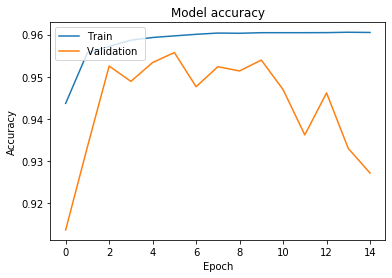

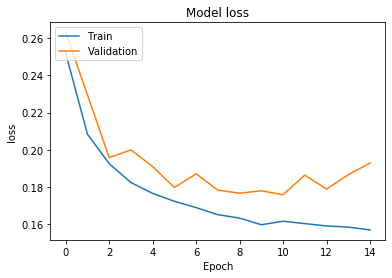

In [189]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation '],loc = 'upper left')
plt.show()

#Plot training and validation loss values 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')

plt.show()

### So we get validation_accuracy of about just more than 95% at epoch 5  